# Inverse kinematic in 2 dimension

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### 2 link robotic arm display

In [45]:
def Display2linkarm(link1, link2, theta1, theta2):
    #fix img size
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    #plot arm
    x1=np.cos(theta1)*link1
    y1=np.sin(theta1)*link1
    x2=x1+np.cos(theta1+theta2)*link2
    y2=y1+np.sin(theta1+theta2)*link2
    plt.plot([0,x1],[0,y1])
    plt.plot([x1,x2],[y1,y2])
    plt.xlim(0,4)
    plt.ylim(0,4)
    #show grid
    plt.grid(True)
    plt.show()  
  

### N link robotic arm display

In [ ]:
def DisplayNlinkarm(links, angles):
    #fix img size
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    #plot arm
    trasf=np.eye(3)
    x=[0]
    y=[0]
    for i in range(len(links)):
        new_trasf=[[np.cos(angles[i]),-np.sin(angles[i]),links[i]*np.cos(angles[i])],
                [np.sin(angles[i]),np.cos(angles[i]),links[i]*np.sin(angles[i])],
                [0,0,1]]
        trasf=np.dot(trasf,new_trasf)
        x.append(np.dot(trasf,[0,0,1])[0])
        y.append(np.dot(trasf,[0,0,1])[1])
    plt.plot(x,y)
    #plt.xlim(0,4)
    #plt.ylim(0,4)
    #show grid
    plt.grid(True)
    plt.show()  

In [61]:
def compute_end_pos(links, angles):
    pos=np.array([0,0,1])
    for i in range(len(links)-1,-1,-1):
        c=np.cos(angles[i])
        s=np.sin(angles[i])
        A=np.array([[c,-s,links[i]*c],[s,c,links[i]*s],[0,0,1]])
        pos=np.dot(A, pos)
    return pos[:2]

In [65]:
def PSO(links, target, pop_size, max_iter, w, c_soc, c_cog):
    #initialize
    dim=len(links)
    pop=np.random.rand(pop_size,dim)*2*np.pi
    vel=np.zeros((pop_size,dim))
    pbest=pop.copy()
    pbest_fit=np.zeros(pop_size)
    gbest=pop[0].copy()
    gbest_fit=1e10

    #initialise pbest and gbest
    for i in range(pop_size):
        pbest_fit[i]=np.linalg.norm(compute_end_pos(links, pop[i])-target)
        if pbest_fit[i]<gbest_fit:
            gbest=pop[i].copy()
            gbest_fit=pbest_fit[i]

    #main loop
    it=0
    while it<max_iter:
        for i in range(pop_size):
            end_pos = compute_end_pos(links, pop[i])
            fit=np.linalg.norm(end_pos-target)

            if fit<pbest_fit[i]:
                pbest[i]=pop[i].copy()
                pbest_fit[i]=fit
                if fit<gbest_fit:
                    gbest=pop[i].copy()
                    gbest_fit=fit
                if fit<1e-3:
                    return gbest
                
            vel[i]=w*vel[i]+c_soc*np.random.rand()*(gbest-pop[i])+c_cog*np.random.rand()*(pbest[i]-pop[i])
            pop[i]+=vel[i]      
            
    return gbest

## Test

### 2 Dim

In [68]:
final_pos = PSO([2,2], [1.73,3], 100, 1000, 0.5, 1, 1)

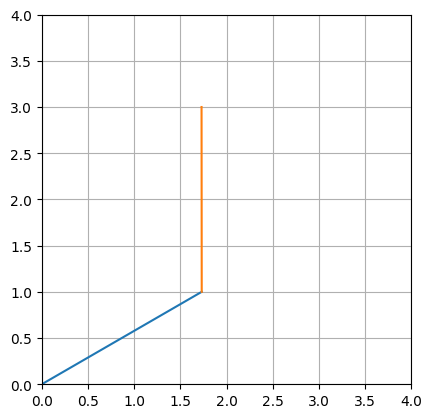

In [69]:
Display2linkarm(2, 2, final_pos[0], final_pos[1])


### N link robotic arm

In [70]:
final_pos = PSO([2,2,2], [1.73,3], 100, 1000, 0.5, 1, 1)

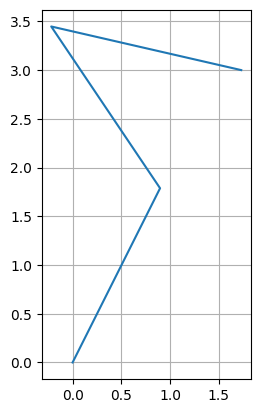

In [71]:
DisplayNlinkarm([2,2,2], final_pos)